# Dimensionality reduction: Kernel PCA (KPCA)

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

**Kernel principal component analysis** (kernel PCA) is an extension of principal component analysis (PCA) using techniques of kernel methods. Using a kernel, the originally linear operations of PCA are performed in a reproducing kernel Hilbert space.

# KPCA

To understand the utility of kernel PCA, particularly for clustering, observe that, while N points cannot, in general, be linearly separated in $ d < N $ dimensions, they can almost always be linearly separated in $ d \geq N $ dimensions.

That is, given $ N $ points, $ x_i $ if we map them to an N-dimensional space with:

$ \Phi(x_i) $ where $ \Phi : \mathbb{R}^{d} \to \mathbb{R}^{N}$ 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.preprocessing import OrdinalEncoder

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

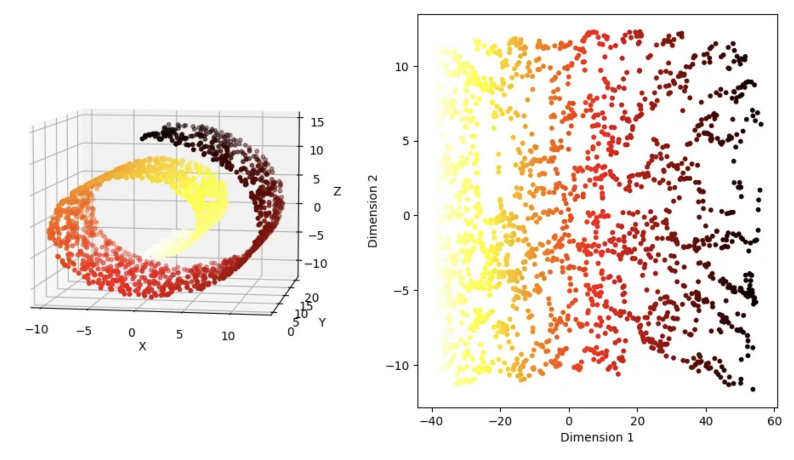

In [4]:
display_img('KPCA.png', 10, 10)

In [5]:
start = time.time()

# Applying algorithm

In [6]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [7]:
X, y = make_circles(n_samples = 1_000, factor = 0.3, noise = 0.05, random_state = 0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [9]:
import matplotlib.pyplot as plt

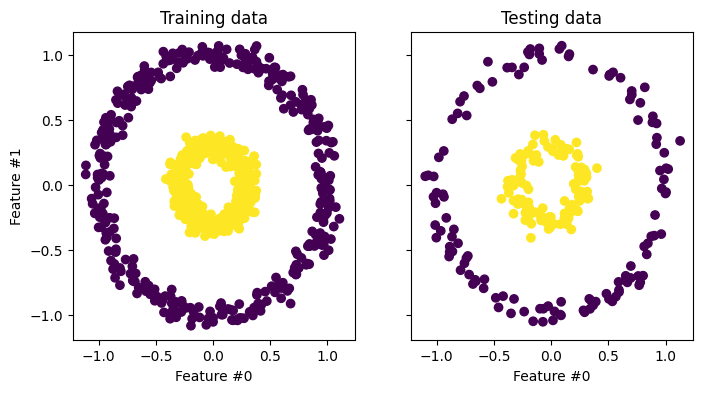

In [10]:
_, (train_ax, test_ax) = plt.subplots(ncols = 2, sharex = True, sharey = True, figsize = (8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [11]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components = 2)

kernel_pca = KernelPCA(n_components = None, kernel = "rbf", gamma = 10, fit_inverse_transform = True, alpha = 0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

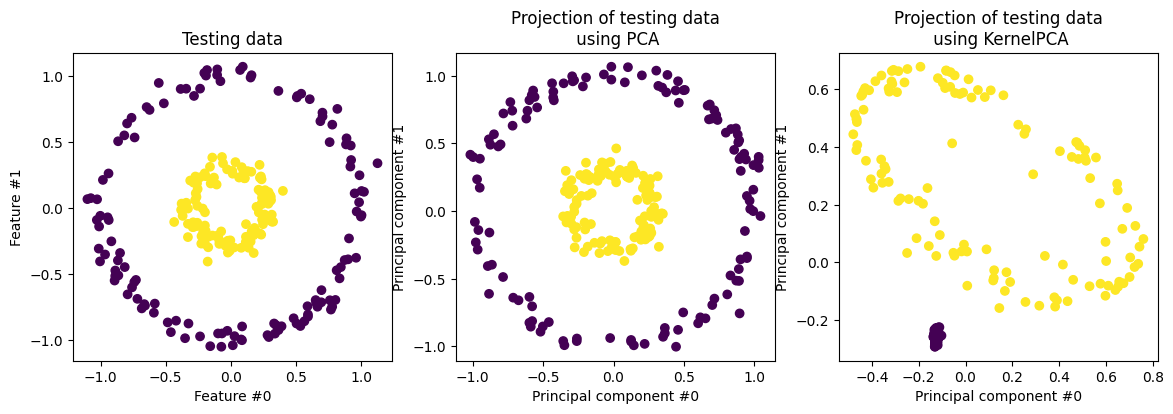

In [12]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols = 3, figsize = (14, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

As you can see using PCA the problem of separate the two classes is as complex as the initial conditions but using KPCA the problem is linearly separable.

### Time of execution

In [13]:
end = time.time()

In [14]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
